In [103]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from k_fold import cross_validation
from proj1_helpers import *
from implementations import *
from helpers import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def cross_validation_visualization(lambds, mse_tr, mse_te):
    """visualization the curves of mse_tr and mse_te."""
    plt.semilogx(lambds, mse_tr, marker=".", color='b', label='train error')
    plt.semilogx(lambds, mse_te, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("rmse")
    plt.title("cross validation")
    plt.legend(loc=2)
    plt.grid(True)
    plt.savefig("cross_validation")

In [59]:
y, x, ids = load_csv_data('../data/train.csv', sub_sample=True)
x = (x - np.mean(x, axis=0))/np.std(x, axis=0)
num_samples = len(y)
tx = np.c_[np.ones(num_samples), x]

In [63]:
y = (y-1)/2.0

array([ 1.,  0.,  0., ...,  1.,  0.,  1.])

In [98]:
lambdas = np.logspace(-7,-1,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, tx, 10, logistic_regression, compute_loss_logistic, {'initial_w': np.zeros(tx.shape[1]), 'max_iters': 100000, 'gamma': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

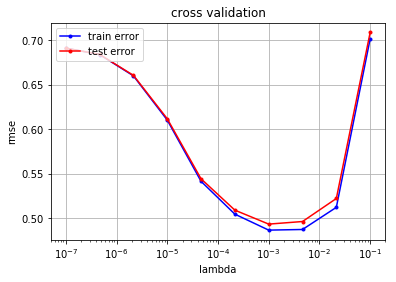

In [99]:
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [100]:
lambdas[np.argmin(rmse_te)]

0.001

In [67]:
tx

array([[ 1.        ,  0.48528033,  0.03965436, ...,  1.54863904,
         1.5407369 ,  0.39818214],
       [ 1.        ,  0.67601018,  0.63344061, ..., -0.64686729,
        -0.64686766, -0.23179611],
       [ 1.        ,  0.3724594 , -0.64151886, ..., -0.64686729,
        -0.64686766, -0.10829837],
       ..., 
       [ 1.        ,  0.49445625, -1.22366112, ..., -0.64686729,
        -0.64686766,  0.23416077],
       [ 1.        ,  0.34254595, -0.11217409, ..., -0.64686729,
        -0.64686766, -0.41106251],
       [ 1.        ,  0.46533331, -1.31829705, ..., -0.64686729,
        -0.64686766, -0.22539659]])

In [112]:
lambdas = np.logspace(-7,-1,10)
rmse_tr = []
rmse_te = []
for lambda_ in lambdas:
    rmse_tr_, rmse_te_ = cross_validation(y, tx, 10, reg_logistic_regression, compute_loss_logistic_reg, {'lambda_': lambda_,'initial_w': np.zeros(tx.shape[1]), 'max_iters': 100000, 'gamma': 0.001}, {'lambda_': lambda_})
    rmse_tr.append(rmse_tr_)
    rmse_te.append(rmse_te_)

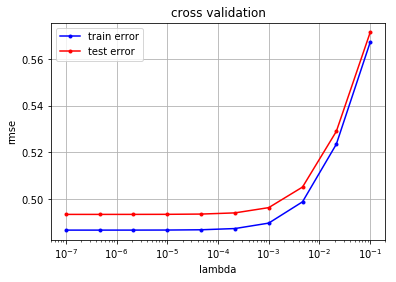

In [113]:
cross_validation_visualization(lambdas, rmse_tr, rmse_te)

In [111]:
lambdas[np.argmin(rmse_te)]

0.001